# Analysis of Rejected loans and it's relation with Approved Loans.

Questions we are trying to answer in our analysis.
    1. No of rejects over time? Increase/Decrease?
    2. DTI ratio of people getting most rejected loans and accepted loan.
    3. States where there are most rejected loans.
    4. Does Employment length has to do anything with rejection of loans?
    5. Frequency plot for Employment Length
    6. Based on the employment length, What is the appropiate loan amount people should apply for?
    7. No. of loans for each employment length.
    8. Relationship of Amount requested and employment length?

In [ ]:
# Read loan data from lending club

import pandas as pd
import datetime

# Creating data frames all_data and all_data_declined for aceepted and declined loans.

all_data = pd.read_csv('clean_accepted_loans.csv',index_col = 'issue_d') ##encoding = 'iso-8859-1')
all_data_declined = pd.read_csv('RejectLoan.csv', index_col='Application Date')

In [15]:
## accepted loans
# setting issue_d as index
#all_data.set_index('issue_d', inplace=True)
#all_data_declined.set_index('Application Date', inplace=True)

# changing index (issue_d) to datetime (date-month-year-time) so that we can sort it
all_data.index = pd.to_datetime(all_data.index)
all_data_declined.index = pd.to_datetime(all_data_declined.index)

# sorting the columns
all_data.sort_index(axis=1, inplace=True)
all_data_declined.sort_index(axis=1, inplace=True)



In [16]:
all_data_declined.head()

,Amount Requested,Debt-To-Income Ratio,Employment Length,Loan Title,Policy Code,Risk_Score,State,Zip Code
Application Date,,,,,,,,
2007-05-26,1000.0,0.10,4 years,Wedding Covered but No Honeymoon,0,693.0,NM,481xx
2007-05-26,1000.0,0.10,< 1 year,Consolidating Debt,0,703.0,MA,010xx
2007-05-27,11000.0,0.10,1 year,Want to consolidate my debt,0,715.0,MD,212xx
2007-05-27,6000.0,0.39,< 1 year,waksman,0,698.0,MA,017xx
2007-05-27,1500.0,0.09,< 1 year,mdrigo,0,509.0,MD,209xx


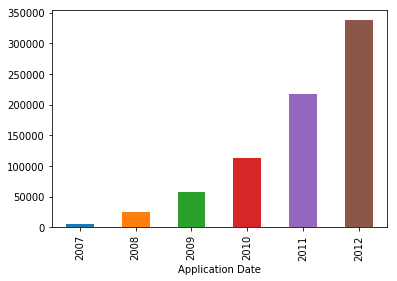

In [17]:
rejects = all_data_declined.groupby(all_data_declined.index.year)['Amount Requested'].count()
rejects.plot(kind='bar')

Observation: As we have been observing in accepted loans file, it is true in rejected files too that the number of loan entries in lending loan dataset has incresed overtime.

# Debt to Income Ratio
Below we compare the dti ratio between accepted and rejected loans. We will do a side by side comparison to get an idea of the difference between them.

Calculate the top 20 DTI ratio of accepted and rejected loans. And then plot them

In [18]:
dti_accepted_100 = all_data['dti'].sort_values(ascending = False)[1:20]
dti_rejected_100 = all_data_declined['Debt-To-Income Ratio'].sort_values(ascending = False)[1:20]
dti_rejected_100

Application Date
2012-03-12    44088.0
2009-08-11    39672.0
2007-12-20    36264.0
2009-06-08    34188.0
2012-10-29    32256.0
2009-05-19    27996.0
2012-05-22    23844.0
2009-02-26    19884.0
2009-07-09    19848.0
2009-06-01    19248.0
2009-10-04    18864.0
2008-12-17    16908.0
2009-05-16    16668.0
2009-04-16    15384.0
2009-07-07    15228.0
2012-03-08    14992.2
2009-04-25    14448.0
2008-07-30    14208.0
2009-02-18    13620.0
Name: Debt-To-Income Ratio, dtype: float64

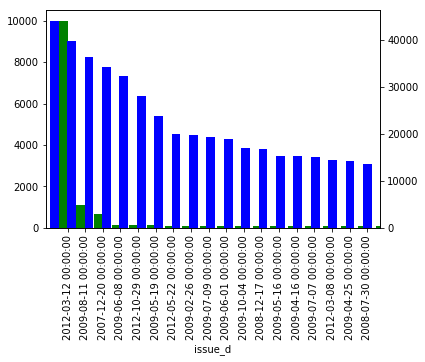

In [19]:
# DTI ratio of people getting most rejected loans.
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(16, 4)
ax = fig.add_subplot(111)
ax2 = ax.twinx()
dti_accepted_100.plot(kind='bar',color='green',ax = ax, position = 1)
dti_rejected_100.plot(kind='bar',color = 'blue', ax = ax2, position = 2)
ax.set_ylabel= ('accepted loans')
ax2.set_ylabel=('rejected loans')
plt.show()

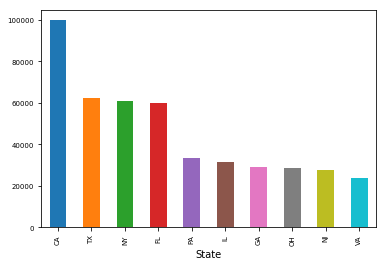

In [20]:
#States and Accepted/Rejected Loans
#Taking our analysis on rejected loans further, we analyze the distribution of rejected loans across state and try to visualize if there are particular states where loans are more rejected than another.

#Plotting top 10 states having maximum number of rejected loans.

rr = all_data_declined.groupby('State')['Zip Code'].count().sort_values(ascending=False)[0:10]
rr.plot(kind='bar', fontsize=7)

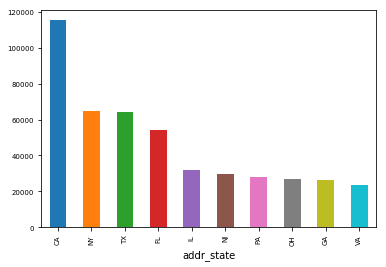

In [21]:
#Plotting top 10 states having maximum number of accepted loans.

tt = all_data.groupby('addr_state')['id'].count().sort_values(ascending=False)[0:10]
tt.plot(kind='bar', fontsize=7)

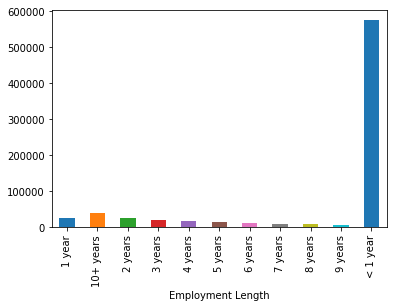

In [22]:
#Relationship between Employment length and rejection of loans?
#Let's plot the number of rejected loans per Employment length.

pp = all_data_declined.groupby('Employment Length')['Zip Code'].count()
pp.plot(kind='bar')

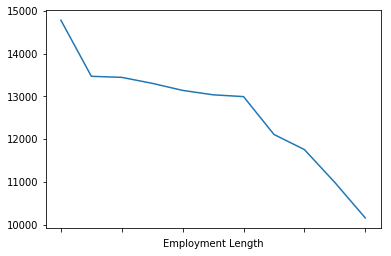

In [23]:
#Observation: We can clearly observe from the above plot that Employment length has direct corelation with loan rejection. More than 90 percent of the loans are rejected when the applicant has less than 1 year of employment.

#Relationship of Amount requested and employment length?

ii = all_data_declined.groupby('Employment Length')['Amount Requested'].mean().sort_values(ascending=False)
ii.plot(kind='line')

Observation: From the above graph we conclude that there is no direct relation between Employment length and Loan Amount. Average Loan amount requested is higher if the employment length is higher.